# Proyek Akhir: Menyelesaikan Permasalahan Human Resources

- Nama: Steven Faustin Orginata
- Email: stevenfo0711@gmail.com
- Id Dicoding: steven-fo

## Persiapan

### Menyiapkan library yang dibutuhkan

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

### Menyiapkan data yang akan diguankan

In [11]:
df = pd.read_csv('data/employee_data.csv')
df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2


## Data Understanding

In [12]:
df.shape

(1470, 35)

In [13]:
df.columns

Index(['EmployeeId', 'Age', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [15]:
df.isna().sum()

EmployeeId                    0
Age                           0
Attrition                   412
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [21]:
df['Attrition'].value_counts()

Attrition
0.0    879
1.0    179
Name: count, dtype: int64

In [16]:
df = df.dropna(subset=['Attrition'])

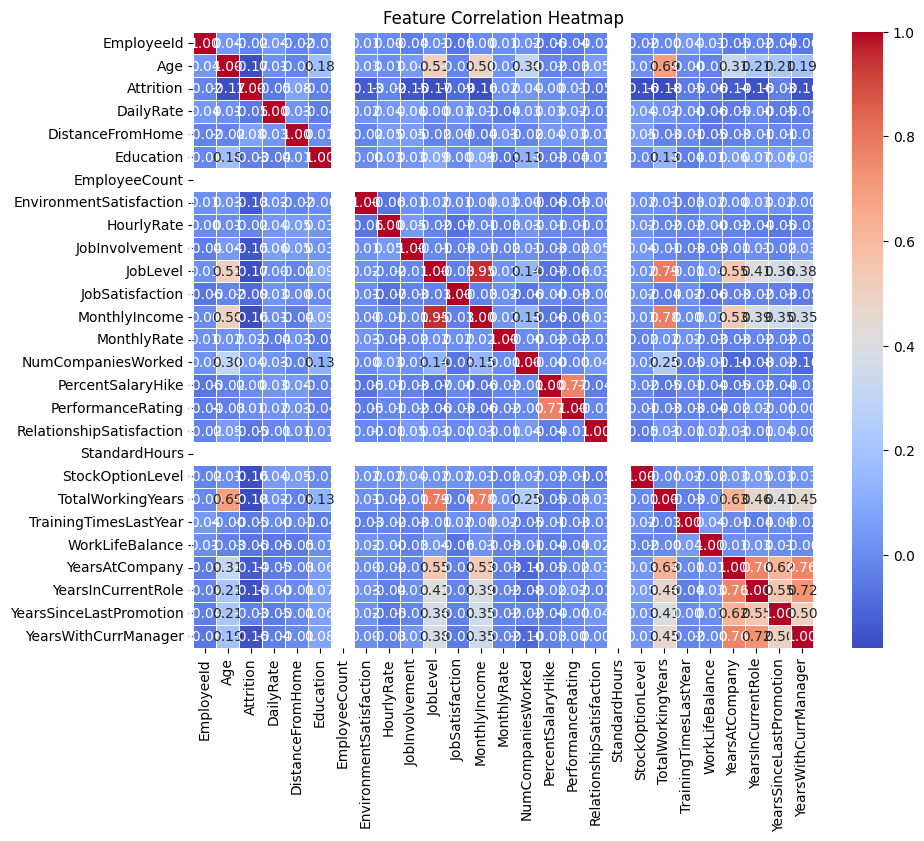

In [17]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.show()

In [18]:
df = df.drop(columns=['JobLevel'])

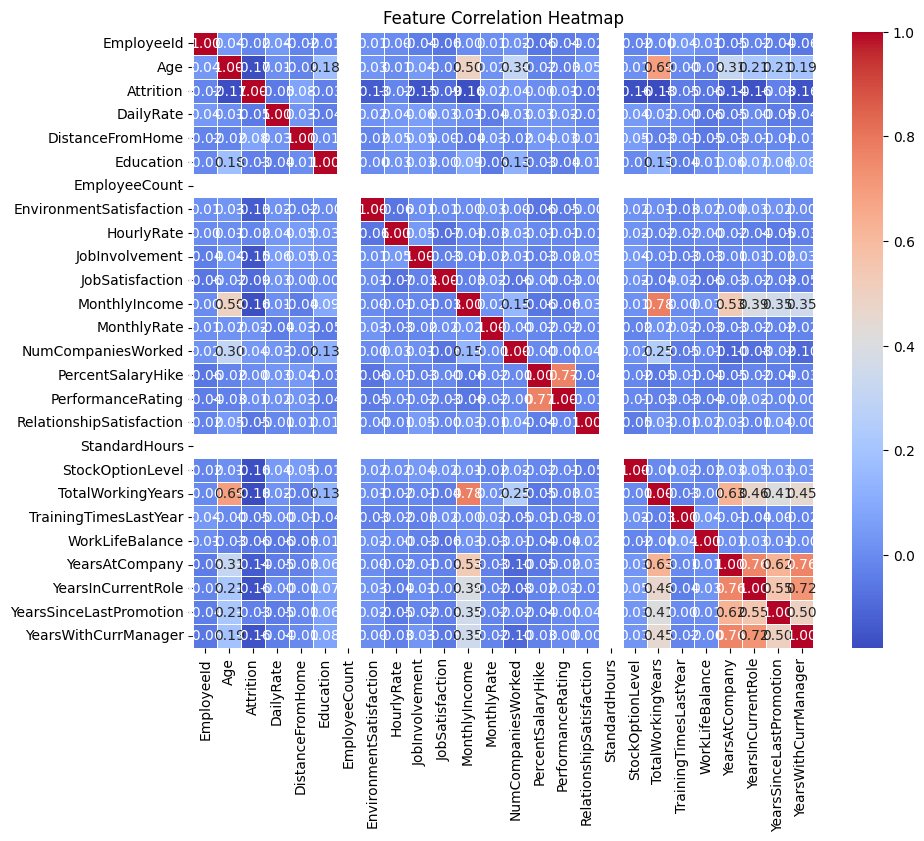

In [19]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

plt.title('Feature Correlation Heatmap')
plt.show()

In [20]:
categorical_cols = [
    'BusinessTravel', 'Department', 'EducationField', 'Gender',
    'JobRole', 'MaritalStatus', 'OverTime'
]

anova_results = {}

for col in categorical_cols:
    groups = [df[df[col] == val]['Attrition'].dropna() for val in df[col].dropna().unique()]
    if len(groups) > 1:
        try:
            f_stat, p_val = f_oneway(*groups)
            anova_results[col] = {'F-statistic': f_stat, 'p-value': p_val}
        except Exception as e:
            anova_results[col] = {'error': str(e)}

anova_df = pd.DataFrame(anova_results).T.sort_values('p-value')
print(anova_df)

                F-statistic       p-value
OverTime          73.970314  2.828069e-17
JobRole            8.779605  1.131483e-11
MaritalStatus     19.449081  5.074128e-09
BusinessTravel     6.768417  1.200086e-03
EducationField     1.969441  8.063917e-02
Department         2.317216  9.904897e-02
Gender             0.266607  6.057248e-01


## Data Preparation / Preprocessing

## Modeling

## Evaluation